# Amazon Sales

Amazon is a global e-commerce company founded by Jeff Bezos. It offers a vast selection of products, ranging from books and electronics to clothing and household goods. With its user-friendly platform and efficient logistics, Amazon has become a dominant force in online shopping worldwide.

- Amazon's sales analysis reveals seasonal peaks during events like Black Friday and Prime Day. Different product categories drive sales, and third-party sellers play a significant role. International expansion provides growth opportunities. Detailed data is needed for comprehensive analysis.

In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Import Dataset

In [4]:
sale = pd.read_csv(r"C:\Users\user\Data Analyst Project\Amazon_Sales_Analysis\Amazon_Sale.csv")

In [5]:
sale.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


- Size of the dataset

In [6]:
sale.shape

(128976, 21)

- Here is 128976 Rows and 21 columns

In [7]:
sale.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


- It describe "integer" data

In [8]:
sale.describe(include='object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,128976,128976,128976,128976,128976,128976,128976,128976,128976,121176,128941,128941,128941,39263
unique,120229,91,13,2,2,2,9,11,4,1,8948,69,1,1
top,403-4984515-8861958,05-03-2022,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,2085,77815,89713,128852,88630,50292,22373,109486,121176,11208,22272,128941,39263


- It describe "object" data

In [9]:
# Describe specific columns

sale[['Qty','Amount']].describe()

,Qty,Amount
count,128976.000000,121176.000000
mean,0.904401,648.562176
std,0.313368,281.185041
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [10]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [11]:
# Remove Unnecessary Column

In [12]:
sale.drop(['New','PendingS'],axis=1, inplace=True)

In [13]:
sale.drop(['index'], axis =1, inplace=True)

In [14]:
sale.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [15]:
# Finding Missing Values

In [16]:
sale.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [17]:
# Handling Missing Values

In [18]:
sale.dropna(subset=['currency','Amount','ship-city','ship-state','ship-postal-code','ship-country','fulfilled-by' ], inplace=True)

In [19]:
sale.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

# Exploratory Data Analysis

In [20]:
sale.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [21]:
sale.shape

(37514, 18)

**Size**

In [22]:
import seaborn as sns

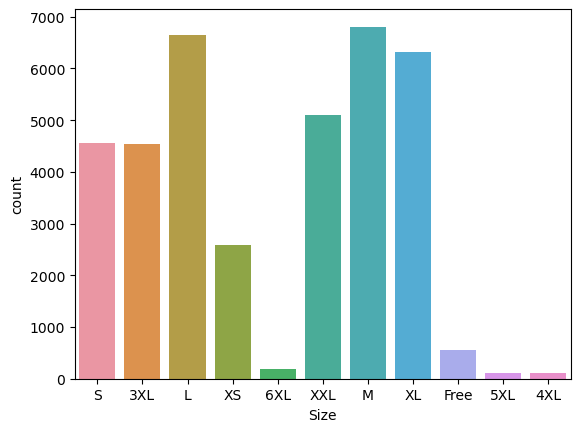

In [23]:
ax = sns.countplot(x='Size', data = sale)

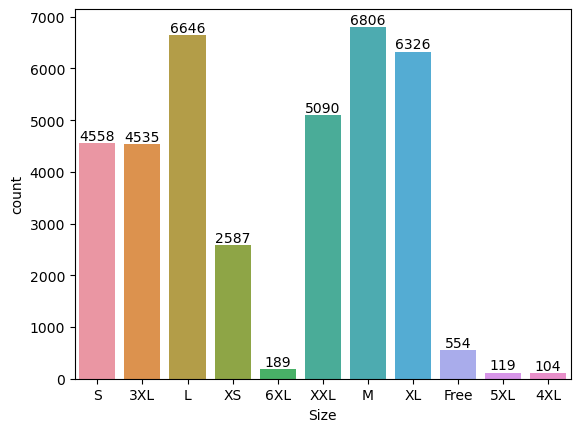

In [24]:
ax = sns.countplot(x='Size', data = sale)

for bar_g in ax.containers:
    ax.bar_label(bar_g)

**Based on the provided graph, it is evident that the majority of individuals prefer to purchase clothing items in 'M-size'. This observation indicates that 'M-size' is the most popular choice among customers.**

# **Group By**

The groupby() function in pandas is used to group data based on one or more columns in a Dataframe

In [25]:
result = sale.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)

<Axes: xlabel='Size', ylabel='Qty'>

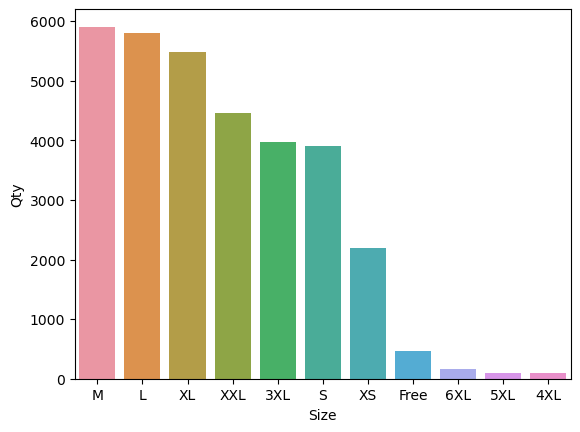

In [26]:
Result = sale.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)

sns.barplot(x='Size',y='Qty', data=Result)

**M-size has the highest quantity of purchases, as observed from the provided barplot**

# Status

<Axes: xlabel='Courier Status', ylabel='count'>

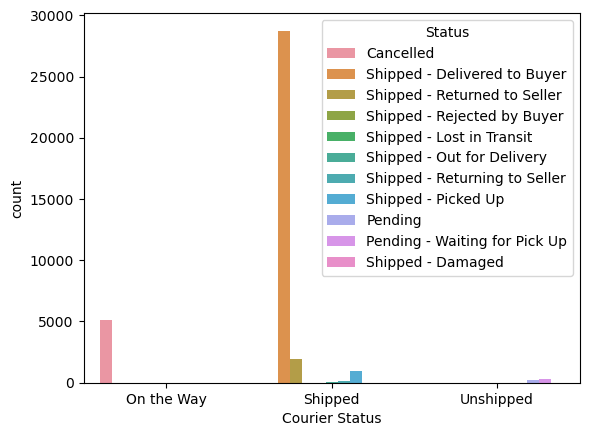

In [27]:
sns.countplot(data = sale, x='Courier Status', hue='Status')

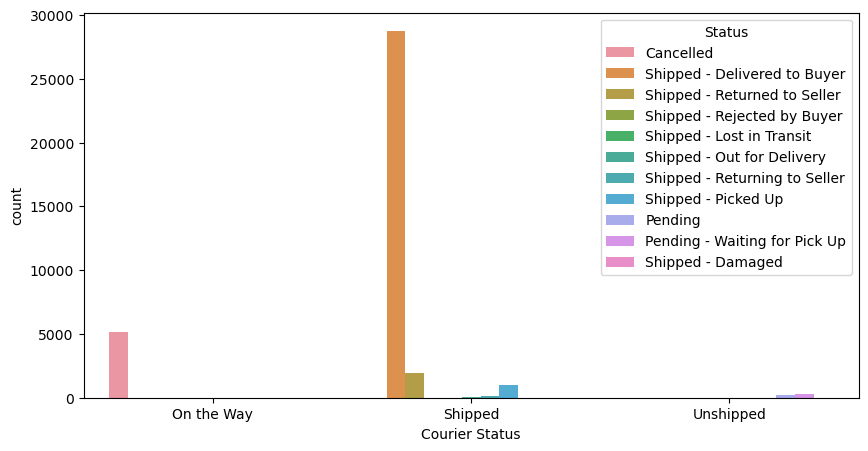

In [28]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=sale, x='Courier Status', hue='Status')

plt.show()

**The majority of the couriers in the dataset indicate that the shipments have been shipped.**

<Axes: >

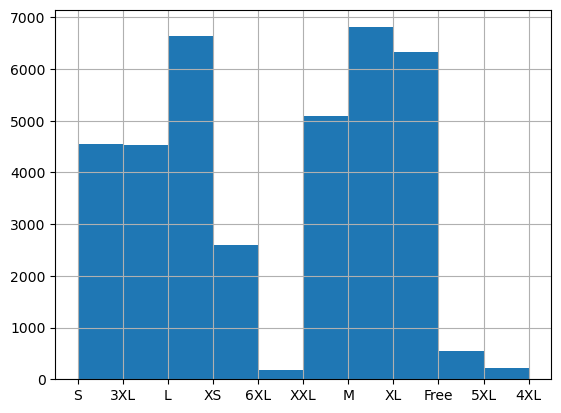

In [29]:
#Histogram
sale['Size'].hist()

<function matplotlib.pyplot.show(close=None, block=None)>

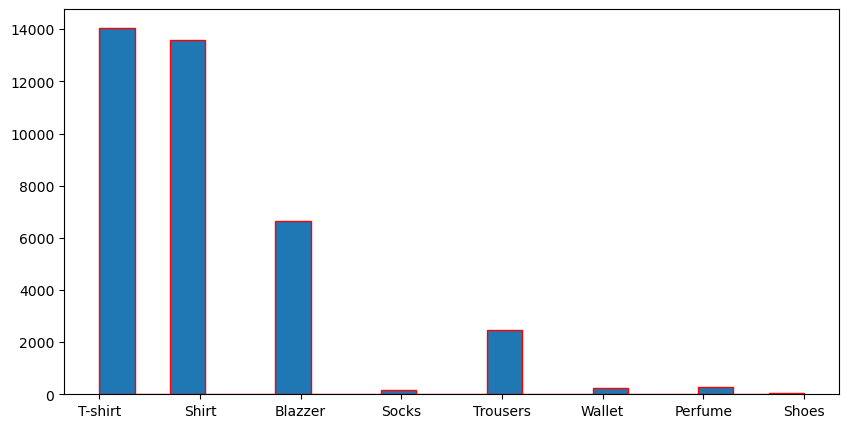

In [30]:
sale['Category'] = sale['Category'].astype(str)      # by using astype(str) we change object to str
column_data = sale['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data, bins=20,edgecolor = 'red')   # bin fo giving the spaces in bars
#lt.xticks(rotation=90)
plt.show

- **Based on the graph plot, it is clear that the majority of customers prefer to purchase t-shirts, followed by shirts.**

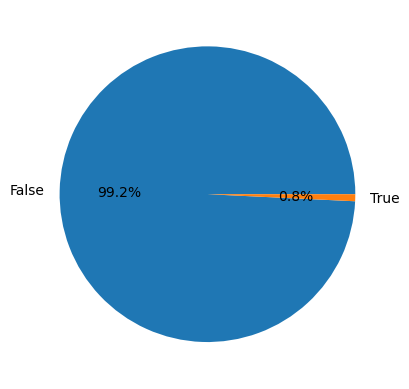

In [31]:
#Checking B2B data by using pie chart
B2B_data = sale['B2B'].value_counts()

#plot pie chart
plt.pie(B2B_data, labels=B2B_data.index, autopct='%1.1f%%')
plt.show()

- **According to the pie chart, it is evident that the vast majority, approximately 99.2%, of buyers are retailers, while a small portion, approximately 0.8%, consists of B2B (business-to-business) buyers.**

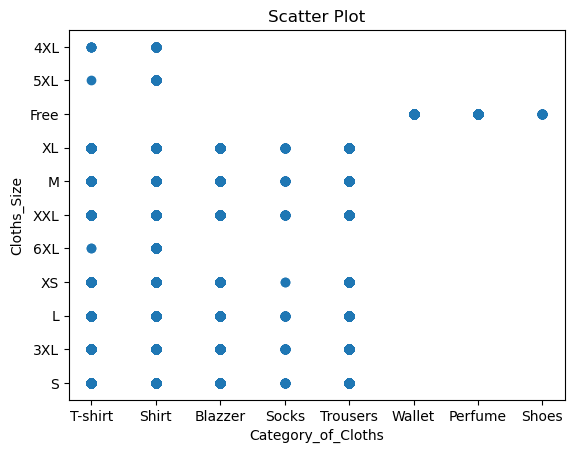

In [32]:
#Scatter plot

x = sale['Category']
y = sale['Size']

plt.scatter(x,y)
plt.xlabel('Category_of_Cloths')
plt.ylabel('Cloths_Size')
plt.title('Scatter Plot')
plt.show()

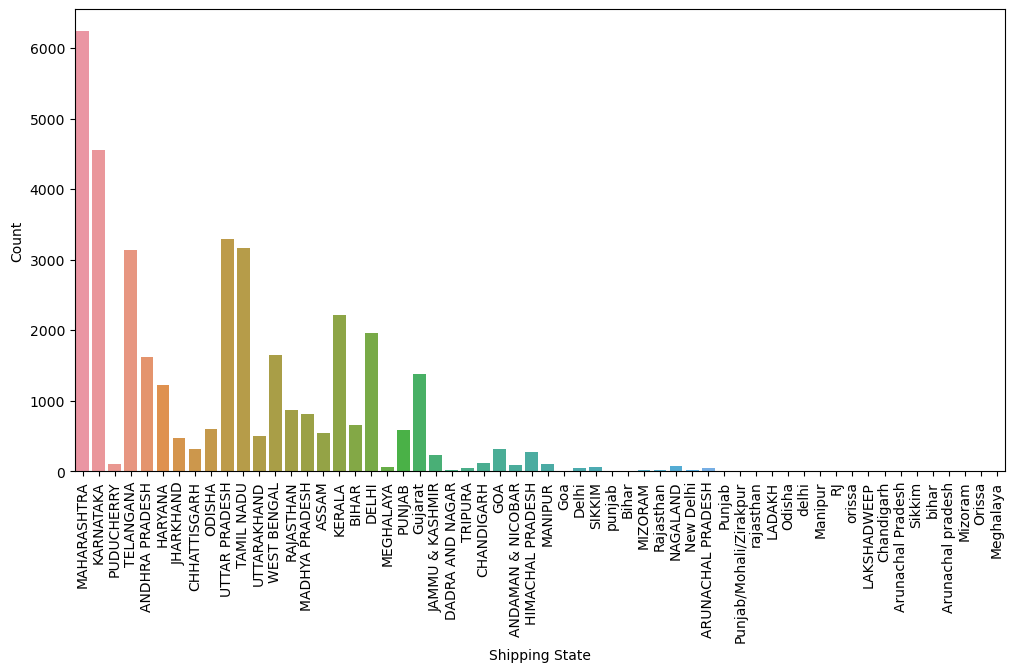

In [33]:
#Count of cities by store

plt.figure(figsize=(12,6))
sns.countplot(data=sale, x='ship-state')
plt.xlabel('Shipping State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

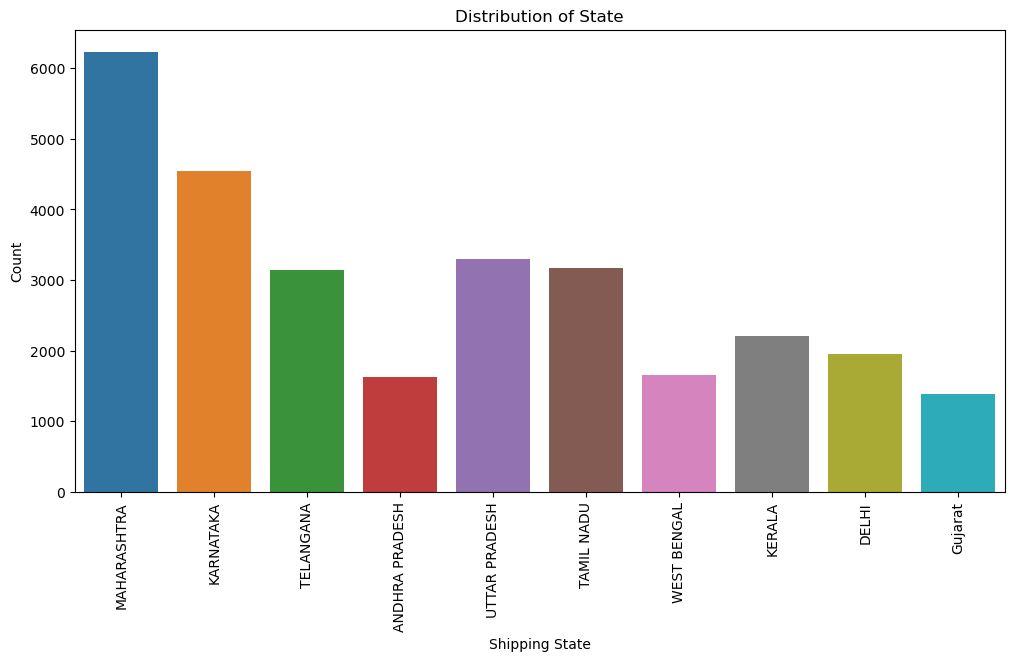

In [34]:
# we wont to find top 10 states
top_10_states = sale['ship-state'].value_counts().head(10)


#Count of cities by store
plt.figure(figsize=(12,6))
sns.countplot(data=sale[sale['ship-state'].isin(top_10_states.index)], x='ship-state')
plt.xlabel('Shipping State')
plt.ylabel('Count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

- **Based on the bar plot shown above, it is clear that the majority of buyers are from the state of Maharashtra.**

# Conclusion

**The data analysis reveals an impressive customer base for the business, particularly in the vibrant state of Maharashtra. The business primarily caters to retailers and effectively fulfills orders through Amazon. Notably, there is a remarkable demand for t-shirts, with M-size emerging as the preferred choice among buyers. These findings highlight the business's strong presence, successful operational strategy, and the alignment of customer preferences, positioning it for continued growth and success.**